## Analysis of the current language situation in Morocco

#### Importing labrieres :

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Geeting the data :

In [4]:
data=pd.read_excel("Data.xlsx")
data.sample(7)

,Отметка времени,gender,age,city,Languages,Where do you speak Berber language?,Where do you speak Arabic(Darija)?,Where do you speak English?,Where do you speak French?,Where do you speak Spanish?,Where do you speak Italian?,Berber Writing,Berber Dialect
69,2020-09-15 12:43:31.336,Female,21,nador,"Berber language, Arabic(Darija)",society(public places),"school/university, home(family), society(publi...",NaN,school/university,NaN,NaN,No,tarifit
24,2020-09-07 01:04:47.418,Male,19,Agadir,"Berber language, Arabic(Darija), French, English",home(family),"school/university, society(public places), wor...","school/university, work place","school/university, society(public places), wor...",NaN,NaN,No,Tamazight
57,2020-09-15 10:57:04.596,Female,19,Meknes,"Arabic(Darija), French, English",NaN,"school/university, home(family), society(publi...",With myself,school/university,NaN,NaN,No,NaN
63,2020-09-15 11:58:36.076,Male,22,Errachidia,"Berber language, Arabic(Darija), French, English","home(family), society(public places), work place","society(public places), work place",school/university,"school/university, society(public places), wor...",NaN,NaN,Yes,Tashlhit
58,2020-09-15 11:35:46.283,Female,21,Casablanca,Arabic(Darija),NaN,"school/university, home(family), society(publi...",school/university,school/university,NaN,NaN,No,NaN
72,2020-09-15 12:52:34.198,Female,21,Morroco,"Arabic(Darija), French, English","school/university, society(public places)","school/university, home(family), society(publi...",work place,"school/university, home(family), society(publi...",I no speak spanish,I no speak italian,Yes,Other
67,2020-09-15 12:24:30.457,Male,20,Fes,"Berber language, Arabic(Darija), French, English","home(family), I speak when i am in Agadir or w...","school/university, home(family), society(publi...",Social media.... And for studying,"school/university, French is a useless languag...",NaN,NaN,Yes,Tamazight


In [5]:
print("Dimension of the data set : ",data.shape)

Dimension of the data set :  (103, 13)


#### Summary of the data :

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Отметка времени                      103 non-null    datetime64[ns]
 1   gender                               103 non-null    object        
 2   age                                  103 non-null    int64         
 3   city                                 103 non-null    object        
 4   Languages                            103 non-null    object        
 5   Where do you speak Berber language?  75 non-null     object        
 6   Where do you speak Arabic(Darija)?   101 non-null    object        
 7   Where do you speak English?          79 non-null     object        
 8   Where do you speak French?           83 non-null     object        
 9   Where do you speak Spanish?          20 non-null     object        
 10  Where do you s

In [7]:
data.describe()

,age
count,103.000000
mean,24.009709
std,10.715112
min,8.000000
25%,20.000000
50%,21.000000
75%,23.000000
max,99.000000


## Data Cleaning :

In [8]:
data.isnull().sum()

Отметка времени                         0
gender                                  0
age                                     0
city                                    0
Languages                               0
Where do you speak Berber language?    28
Where do you speak Arabic(Darija)?      2
Where do you speak English?            24
Where do you speak French?             20
Where do you speak Spanish?            83
Where do you speak Italian?            87
Berber Writing                          8
Berber  Dialect                        28
dtype: int64

In [9]:
#Delete the first column :
data.drop(["Отметка времени"],axis=1,inplace=True)

Cleaning city column :

In [10]:
data["city"].unique()

array(['Agadir ', 'Agadir', 'Fes ', 'Aachen', 'Ouarzazate', 'Morocco ',
       'Bénimellal', 'CASABLANCA', 'Kalaa des sraghna ', 'Berkane ',
       'Rabat, Morocco', 'agadir', 'Fes', 'Salé', ' Casablanca',
       'Casablanca', 'Rabat', 'Sale', 'Tangier', 'Taroudant ', 'Midelt',
       'Fez city ', 'Fez (Morocco) ', 'Youssoufia', 'Tiznit ',
       'Marrakech ', 'El houcima ', 'Casablanca ', 'Brest', 'AGADIR',
       'safi', 'Khemisset ', 'ZAGORA ', 'Khenifra', 'Had soualem', 'Safi',
       'Tinghir', 'Ouled teima', 'Meknes', 'Settat', 'Errachidia', 'SAFi',
       'Oujda', 'nador', 'Étudiante ', 'Morroco ', 'Marrakech', 'Belfaa',
       'OUARZAZATE', 'Alhoceima ', 'Sefrou', 'Ben Guerir', 'El jadida',
       'casablanca', 'tiznit', 'Casa blanca ', 'casablanca ',
       'El jadida ', 'imilchil', 'Salé ', 'Sidi bennour', 'NADOR', 'Fsz',
       'Morocco - Casablanca'], dtype=object)

In [11]:
data['city']=data['city'].apply(lambda x: x.lower()).str.replace(' ','')
data['city']=data['city'].replace('rabat,morocco','rabat')
data['city']=data['city'].replace('morocco-casablanca','casablanca')
data['city']=data['city'].replace('fez(morocco)','fes')
data['city']=data['city'].replace('fsz','fes')
data['city']=data['city'].replace('fezcity','fes')
data['city']=data['city'].replace('étudiante','morocco')
data['city']=data['city'].replace('morroco','morocco')

In [12]:
data["city"].value_counts().head()

casablanca    22
agadir        17
fes            6
rabat          5
safi           5
Name: city, dtype: int64

## Exploratory Data Analysis :

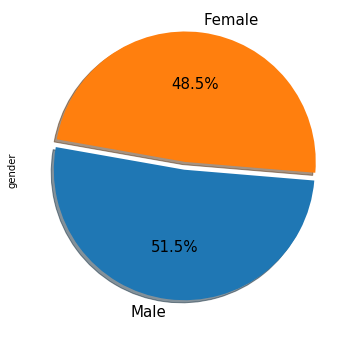

In [14]:
plt.figure(figsize=(6,6))
explode = (0, 0.06,)
data["gender"].value_counts().plot.pie( explode=explode,autopct='%1.1f%%', shadow=True, startangle=170,textprops={'fontsize': 15})
plt.show()

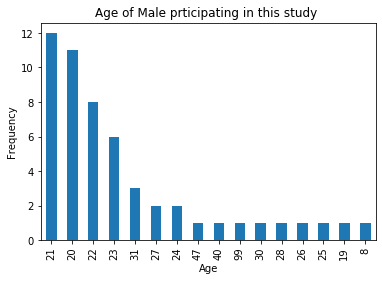

In [15]:
data[data["gender"]=="Male"]["age"].value_counts().plot.bar()
plt.title("Age of Male prticipating in this study ")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

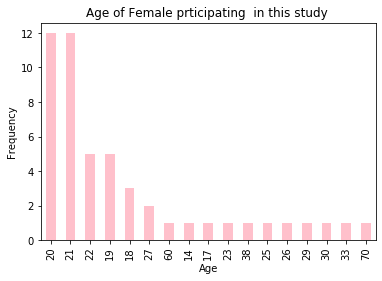

In [16]:
data[data["gender"]=="Female"]["age"].value_counts().plot.bar(color="pink")
plt.title("Age of Female prticipating  in this study ")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [17]:
data["Languages"].value_counts()

Berber language, Arabic(Darija), French, English                      30
Arabic(Darija), French, English                                       19
Arabic(Darija), French                                                11
Berber language, Arabic(Darija)                                        9
Berber language, Arabic(Darija), English                               6
Berber language, Arabic(Darija), French                                6
Arabic(Darija), English                                                4
Arabic(Darija)                                                         4
Berber language                                                        3
Arabic(Darija), French, English, allemande                             1
Arabic(Darija), French, English, Turkish                               1
Berber language, Arabic(Darija), Spanish, English                      1
Arabic(Darija), French, Spanish, English, Italian                      1
Berber language, Arabic(Darija), French, English, I

In [115]:
values=[[],[],[],[],[]]
Berber,Arabic,French,English,Spanish=values[0],values[1],values[2],values[3],values[4]
languages=["Berber language","Arabic(Darija)","French","English","spanish"]

for i in range(len(data["Languages"])):
    for j in range(len(languages)):
        if languages[j] in str(data["Languages"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")

LanguagesDf=pd.DataFrame({'Berber': Berber, 
        'Arabic':Arabic, 
        'French':French,
        'English' :English,
        'Spanish':Spanish
        } )  
df1= pd.concat([LanguagesDf,data[["age","gender","city"]]], axis=1, join="inner")

In [116]:
df1.sample(5)

,Berber,Arabic,French,English,Spanish,age,gender,city
26,No,Yes,Yes,Yes,No,21,Female,tangier
22,No,Yes,Yes,No,No,29,Female,sale
66,No,Yes,No,No,No,21,Female,casablanca
51,Yes,Yes,Yes,Yes,No,19,Female,zagora
28,No,Yes,Yes,Yes,No,22,Male,taroudant


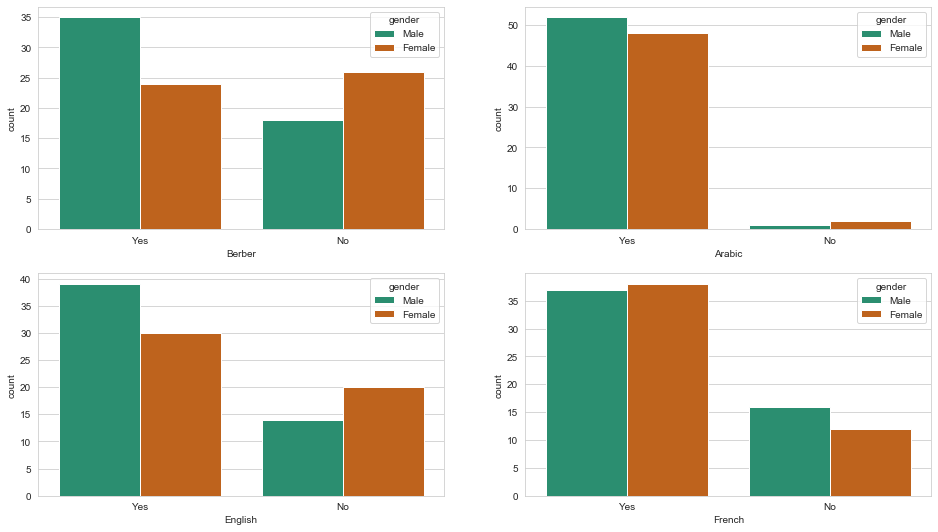

In [117]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.countplot(x="Berber",hue="gender",data=df1)
plt.subplot(2,2,2)
sns.countplot(x="Arabic",hue="gender",data=df1)
plt.subplot(2,2,3)
sns.countplot(x="English",hue="gender",data=df1)
plt.subplot(2,2,4)
sns.countplot(x="French",hue="gender",data=df1)
plt.show()

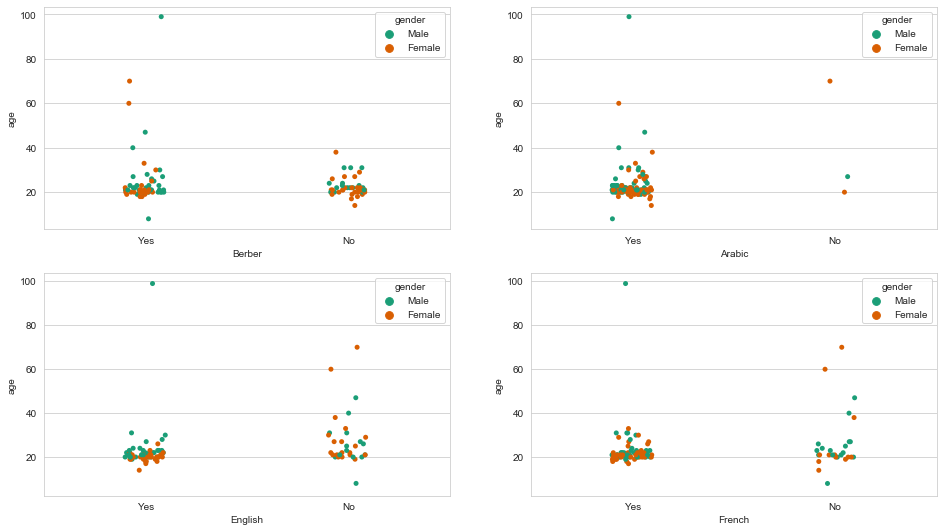

In [118]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.stripplot(y="age",x="Berber",hue="gender",data=df1)
plt.subplot(2,2,2)
sns.stripplot(y="age",x="Arabic",hue="gender",data=df1)
plt.subplot(2,2,3)
sns.stripplot(y="age",x="English",hue="gender",data=df1)
plt.subplot(2,2,4)
sns.stripplot(y="age",x="French",hue="gender",data=df1)
plt.show()

1) Berber Language :

In [132]:

values=[[],[],[],[],[]]
school,home,society,workplace=values[0],values[1],values[2],values[3]
Places=["school/university","society(public places)","home(family)","work place"]

for i in range(len(data["Where do you speak Berber language?"])):
    for j in range(len(Places)):
        if Places[j] in str(data["Where do you speak Berber language?"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")        

BerberPlace=pd.DataFrame({'InSchool': school, 
        'InSociety':society, 
        'InWorkplace':workplace,
        'In Home'   :home
        } ) 
BerberPlace=pd.concat([BerberPlace,data[["gender","age"]]],axis=1,join="inner") 

In [138]:
BerberPlace.sample(5)

,InSchool,InSociety,InWorkplace,In Home,gender,age
82,Yes,Yes,Yes,Yes,Female,20
19,No,No,No,No,Female,27
43,No,Yes,Yes,Yes,Male,40
64,Yes,Yes,No,No,Female,20
53,No,Yes,No,No,Female,20


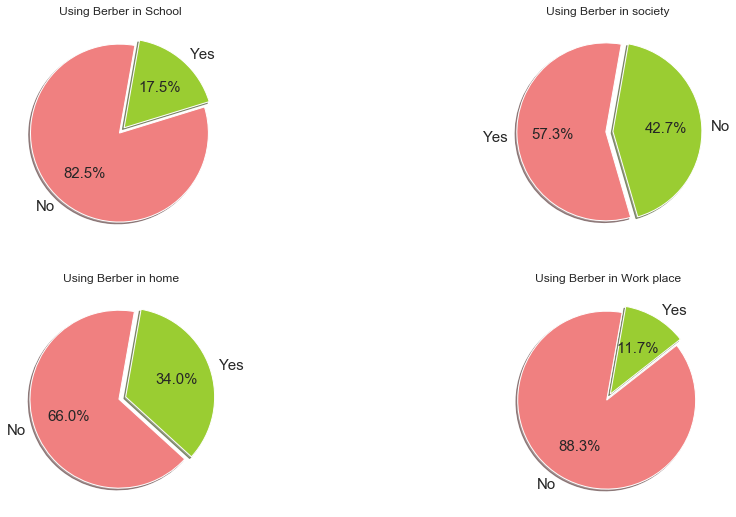

In [135]:
plt.figure(figsize=(16,9))
colors = ['lightcoral','yellowgreen']
explode = (0.02, 0.06)
plt.subplot(2,2,1)
BerberPlace["InSchool"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in School")
plt.ylabel('')
plt.subplot(2,2,2)
BerberPlace["InSociety"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in society")
plt.ylabel('')
plt.subplot(2,2,3)
BerberPlace["In Home"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in home")
plt.ylabel('')
plt.subplot(2,2,4)
BerberPlace["InWorkplace"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in Work place")
plt.ylabel('')
plt.show()

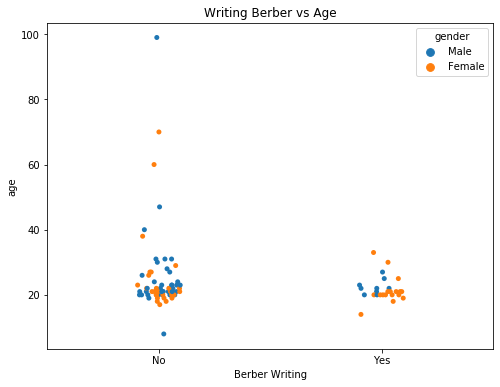

In [60]:
figure=plt.figure(figsize=(8,6))
sns.stripplot(x="Berber Writing",y="age",data=data,hue="gender") 
plt.title("Writing Berber vs Age")
plt.show()

In [15]:
school=[]
home=[]
society=[]
workplace=[]

In [16]:
for i in range(len(data["Where do you speak Arabic(Darija)?"])):
    if "school/university" in str(data["Where do you speak Arabic(Darija)?"][i]):
        school.append("yes")
    else : 
        school.append("No")
    if "society(public places)" in str(data["Where do you speak Arabic(Darija)?"][i]):
        society.append("Yes")
    else :
        society.append("No")
    if "home(family)" in str(data["Where do you speak Arabic(Darija)?"][i]):
        home.append("Yes")
    else :
        home.append("No")   
    if "work place" in str(data["Where do you speak Arabic(Darija)?"][i]):
        workplace.append("Yes")
    else :
        workplace.append("No")   

In [17]:
Darijaplace=pd.DataFrame({'InSchool': school, 
        'InSociety':society, 
        'InWorkplace':workplace,
        'In Home'   :home
        } )

In [18]:
Darijaplace.head()

,InSchool,InSociety,InWorkplace,In Home
0,yes,Yes,No,No
1,yes,Yes,No,No
2,yes,Yes,Yes,No
3,yes,Yes,No,Yes
4,yes,Yes,No,Yes


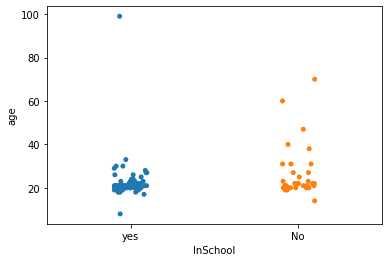

In [24]:
sns.stripplot(y=data["age"],x=Darijaplace["InSchool"])

Text(0, 0.5, '')

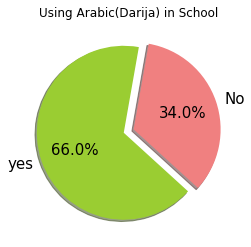

In [52]:
colors = ['yellowgreen', 'lightcoral']
explode = (0.06, 0.06)
Darijaplace["InSchool"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in School")
plt.ylabel('')

Text(0, 0.5, '')

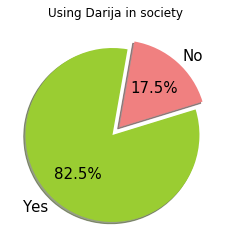

In [50]:
explode = (0.06, 0.06)
Darijaplace["InSociety"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in society")
plt.ylabel('')

Text(0, 0.5, '')

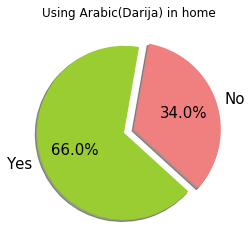

In [54]:
explode = (0.06, 0.06)
Darijaplace["In Home"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in home")
plt.ylabel('')

Text(0, 0.5, '')

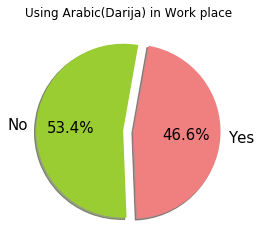

In [56]:
explode = (0.06, 0.06)
Darijaplace["InWorkplace"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in Work place")
plt.ylabel('')